In [2]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Downloading data for SPY and ^VIX from Yahoo Finance

refer = yf.download(['SPY','^VIX'], '2016-01-01')['Adj Close']
refer.rename(columns = {'SPY': 'SP500', '^VIX': 'VIX'}, inplace = True)
refer.head()

[*********************100%***********************]  2 of 2 completed


Ticker,SP500,VIX
Date,,
2016-01-04 00:00:00+00:00,172.953049,20.700001
2016-01-05 00:00:00+00:00,173.245560,19.340000
2016-01-06 00:00:00+00:00,171.060257,20.590000
2016-01-07 00:00:00+00:00,166.956223,24.990000
2016-01-08 00:00:00+00:00,165.123627,27.010000


<Axes: xlabel='Date'>

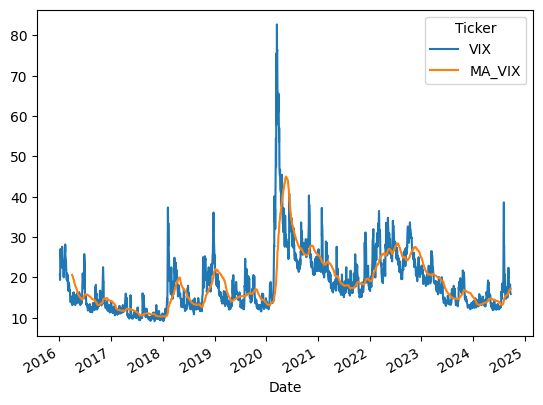

In [11]:
# Calculating the rolling mean of VIX
refer['MA_VIX'] = refer['VIX'].rolling(60).mean()
refer[['VIX', 'MA_VIX']].plot()

In [9]:
# Calculating the daily returns for SP500
refer['return_sp500'] = refer['SP500'] / refer['SP500'].shift(1) - 1
refer[['SP500', 'return_sp500']].head()

KeyError: 'SP500'

In [28]:
# Creating signals for risk and de-risk based on VIX and MA_VIX
refer['signal_risk'] = np.where((refer.VIX > refer.MA_VIX), 1, 0)
refer['signal_derisk'] = np.where((refer.VIX < refer.MA_VIX), 1, 0)
refer.dropna(inplace = True)
refer.head()

Ticker,SP500,VIX,MA_VIX,return_sp500,signal_risk,signal_derisk
Date,,,,,,
2016-03-30 00:00:00+00:00,178.169083,13.56,20.595167,0.004388,0,1
2016-03-31 00:00:00+00:00,177.736679,13.95,20.482667,-0.002427,0,1
2016-04-01 00:00:00+00:00,178.947449,13.10,20.378667,0.006812,0,1
2016-04-04 00:00:00+00:00,178.368027,14.12,20.270833,-0.003238,0,1
2016-04-05 00:00:00+00:00,176.586517,15.42,20.111333,-0.009988,0,1


In [29]:
# Mapping sector ETFs and downloading their Adjusted Close prices
sector_etf = dict({
    'Consumer Discretionary' : 'XLY',
    'Consumer Staples' : 'XLP',
    'Energy' : 'XLE',
    'Financials' : 'XLF' ,
    'Health Care' : 'XLV',
    'Industrials' : 'XLI',
    'Materials' : 'XLB',
    'Real Estate' : 'XLRE',
    'Information Technology' : 'XLK',
    'Communication Services' : 'XLC',
    'Utilities' : 'XLU'
})
df_sector_etf = yf.download(list(sector_etf.values()), '2016-01-01')['Adj Close']
df_sector_etf.head()

[*********************100%***********************]  11 of 11 completed


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2016-01-04 00:00:00+00:00,36.036118,NaN,42.208145,16.104382,44.768238,38.133720,39.717804,22.739386,32.787567,61.440029,69.853943
2016-01-05 00:00:00+00:00,36.019249,NaN,42.369129,16.166403,44.888084,38.034489,39.972771,23.428434,33.022911,61.735374,69.762985
2016-01-06 00:00:00+00:00,35.074932,NaN,40.738197,15.918324,44.194733,37.565361,39.837322,23.202234,32.962162,61.231533,69.081017
2016-01-07 00:00:00+00:00,34.122166,NaN,39.744251,15.470410,42.996326,36.455727,39.359280,22.776712,32.742016,59.989365,67.662476
2016-01-08 00:00:00+00:00,33.776463,NaN,39.233273,15.229214,42.559792,36.167038,39.056511,22.478098,32.726841,59.085972,66.935036


In [30]:
# Calculating average returns for risk and de-risk ETFs
df_sector_etf['return_derisk_etf'] = (df_sector_etf[['XLK', 'XLC', 'XLY']] / df_sector_etf[['XLK', 'XLC', 'XLY']].shift(1) - 1).mean(axis = 1)
df_sector_etf['return_risk_etf'] = (df_sector_etf[['XLU', 'XLP', 'XLV']] / df_sector_etf[['XLU', 'XLP', 'XLV']].shift(1) - 1).mean(axis = 1)
df_sector_etf.head()

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,return_derisk_etf,return_risk_etf
Date,,,,,,,,,,,,,
2016-01-04 00:00:00+00:00,36.036118,NaN,42.208145,16.104382,44.768238,38.133720,39.717804,22.739386,32.787567,61.440029,69.853943,NaN,NaN
2016-01-05 00:00:00+00:00,36.019249,NaN,42.369129,16.166403,44.888084,38.034489,39.972771,23.428434,33.022911,61.735374,69.762985,-0.001952,0.006135
2016-01-06 00:00:00+00:00,35.074932,NaN,40.738197,15.918324,44.194733,37.565361,39.837322,23.202234,32.962162,61.231533,69.081017,-0.011055,-0.004463
2016-01-07 00:00:00+00:00,34.122166,NaN,39.744251,15.470410,42.996326,36.455727,39.359280,22.776712,32.742016,59.989365,67.662476,-0.025037,-0.012988
2016-01-08 00:00:00+00:00,33.776463,NaN,39.233273,15.229214,42.559792,36.167038,39.056511,22.478098,32.726841,59.085972,66.935036,-0.009335,-0.007738


In [31]:
# Merging dataframes and calculating strategy returns
df_all = pd.concat([refer, df_sector_etf[['return_derisk_etf', 'return_risk_etf']]], axis = 1).dropna()
df_all.head()

Ticker,SP500,VIX,MA_VIX,return_sp500,signal_risk,signal_derisk,return_derisk_etf,return_risk_etf
Date,,,,,,,,
2016-03-30 00:00:00+00:00,178.169083,13.56,20.595167,0.004388,0.0,1.0,0.006119,0.001442
2016-03-31 00:00:00+00:00,177.736679,13.95,20.482667,-0.002427,0.0,1.0,-0.001581,-0.000820
2016-04-01 00:00:00+00:00,178.947449,13.10,20.378667,0.006812,0.0,1.0,0.005918,0.008581
2016-04-04 00:00:00+00:00,178.368027,14.12,20.270833,-0.003238,0.0,1.0,-0.005804,0.002706
2016-04-05 00:00:00+00:00,176.586517,15.42,20.111333,-0.009988,0.0,1.0,-0.009079,-0.012812


In [32]:
# Checking for missing values
df_all.isna().sum()

Ticker
SP500                0
VIX                  0
MA_VIX               0
return_sp500         0
signal_risk          0
signal_derisk        0
return_derisk_etf    0
return_risk_etf      0
dtype: int64

In [33]:
# Calculating strategy returns and cumulative performance
df_all['return_strategy'] = df_all['signal_risk'] * df_all['return_risk_etf'].shift(-1) + df_all['signal_derisk'] * df_all['return_derisk_etf'].shift(-1)
df_all['rebased_strategy'] = (df_all['return_strategy'] + 1).cumprod()
df_all['rebased_sp500'] = (df_all['return_sp500'] + 1).cumprod()
df_all.dropna(inplace = True)
df_all.tail()

Ticker,SP500,VIX,MA_VIX,return_sp500,signal_risk,signal_derisk,return_derisk_etf,return_risk_etf,return_strategy,rebased_strategy,rebased_sp500
Date,,,,,,,,,,,
2024-09-16 00:00:00+00:00,561.118896,17.139999,16.852000,0.001477,1.0,0.0,0.001650,0.006162,-0.006852,3.868673,3.163180
2024-09-17 00:00:00+00:00,561.348206,17.610001,16.925500,0.000409,1.0,0.0,0.001047,-0.006852,-0.004364,3.851790,3.164472
2024-09-18 00:00:00+00:00,559.683350,18.230000,17.007167,-0.002966,1.0,0.0,-0.003963,-0.004364,-0.002717,3.841326,3.155087
2024-09-19 00:00:00+00:00,569.234009,16.330000,17.065333,0.017064,0.0,1.0,0.022014,-0.002717,-0.002386,3.832162,3.208927
2024-09-20 00:00:00+00:00,568.250000,16.150000,17.125333,-0.001729,0.0,1.0,-0.002386,0.009046,0.001776,3.838968,3.203380


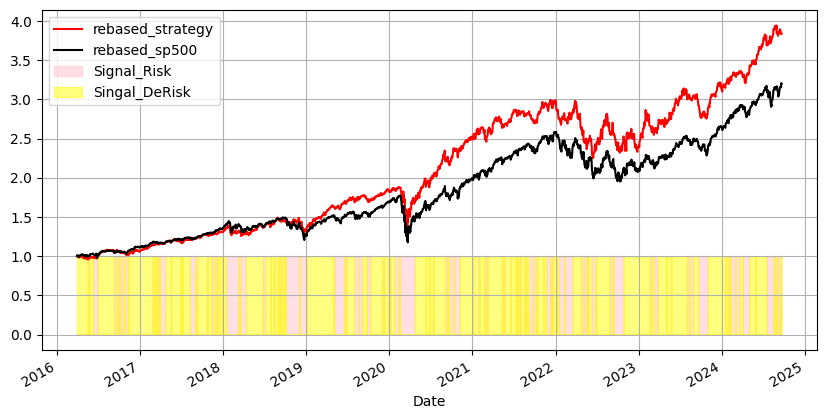

In [34]:
# Plotting cumulative performance with risk and de-risk signals
df_all[['rebased_strategy', 'rebased_sp500']].plot(figsize = (10, 5), color = ['red', 'black'])
plt.fill_between(df_all.index,  df_all.signal_risk, color = 'pink', alpha = 0.5, label = 'Signal_Risk')
plt.fill_between(df_all.index,  df_all.signal_derisk, color = 'yellow', alpha = 0.5, label = 'Singal_DeRisk')
plt.legend()
plt.grid()

In [35]:
# Calculating Sharpe Ratio for S&P 500 and Strategy
sharpe_sp500 = np.mean(df_all.return_sp500) / np.std(df_all.return_sp500) * (252 ** 0.5)
sharpe_strategy = np.mean(df_all.return_strategy) / np.std(df_all.return_strategy) * (252 ** 0.5)
print(f'Sharpe Ratio: S&P 500 {round(sharpe_sp500,2)}; Strategy {round(sharpe_strategy, 2)}')

# Calculating Cumulative Return for S&P 500 and Strategy
print(f'Cumulative Return: S&P 500 {round(df_all.rebased_sp500[-1] - 1, 2) * 100}%; Strategy {round(df_all.rebased_strategy[-1] -1, 2)*100}%')

# Calculating Annualized Return for S&P 500 and Strategy
diff_day = df_all.index[-1] - df_all.index[0]
holding_period = diff_day.days
cum_return_sp500 = df_all.rebased_sp500[-1] - 1
annual_sp500 = (cum_return_sp500 + 1) ** (365/ holding_period) - 1
cum_return_strategy = df_all.rebased_strategy[-1] - 1
annual_strategy = (cum_return_strategy + 1) ** (365/ holding_period) - 1
print(f'Annualized Return: S&P 500 {round(annual_sp500, 2)}; Strategy {round(annual_strategy, 2)}')

# Calculating Maximum Drawdown for S&P 500 and Strategy
running_max_sp500 = np.maximum.accumulate(df_all.rebased_sp500)
running_max_sp500[running_max_sp500 < 1] = 1
DD_sp500 = df_all.rebased_sp500 / running_max_sp500 - 1
MDD_sp500 = DD_sp500.min()
running_max_strategy = np.maximum.accumulate(df_all.rebased_strategy)
running_max_strategy[running_max_strategy < 1] = 1
DD_strategy = df_all.rebased_strategy / running_max_strategy - 1
MDD_strategy = DD_strategy.min()
print(f'Maximum Drawdown: S&P 500: {round(MDD_sp500,2)}; Strategy: {round(MDD_strategy, 2)}')

Sharpe Ratio: S&P 500 0.85; Strategy 0.98
Cumulative Return: S&P 500 220.00000000000003%; Strategy 284.0%
Annualized Return: S&P 500 0.15; Strategy 0.17
Maximum Drawdown: S&P 500: -0.34; Strategy: -0.29


/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_16080/4262678339.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Cumulative Return: S&P 500 {round(df_all.rebased_sp500[-1] - 1, 2) * 100}%; Strategy {round(df_all.rebased_strategy[-1] -1, 2)*100}%')
/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_16080/4262678339.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_return_sp500 = df_all.rebased_sp500[-1] - 1
/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_16080/4262678339.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versi